# Лабораторная работа №1

This data set contains a list of video games with sales greater than 100,000 copies along with critic and user ratings.
### Content
The fields include:

- Name - The game's name
- Platform - Platform of the games release
- YearofRelease - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales (in millions)
- Critic_score - Aggregate score compiled by Metacritic staff
- Critic_count - The number of critics used in coming up with the critic score
- User_score - Score by Metacritic's subscribers
- User_count - Number of users who gave the user score
- Rating - The ESRB ratings

In [205]:

from __future__ import (absolute_import, division, print_function,unicode_literals)
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline
%config InlineBackend.figure.format='svg'
from pylab import rcParams
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

Populating the interactive namespace from numpy and matplotlib


In [206]:
df=pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')
print(df.shape)

(17416, 15)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
Name               17416 non-null object
Platform           17416 non-null object
Year_of_Release    17408 non-null float64
Genre              17416 non-null object
Publisher          17415 non-null object
NA_Sales           17416 non-null float64
EU_Sales           17416 non-null float64
JP_Sales           17416 non-null float64
Other_Sales        17416 non-null float64
Global_Sales       17416 non-null float64
Critic_Score       8336 non-null float64
Critic_Count       8336 non-null float64
User_Score         7798 non-null float64
User_Count         7798 non-null float64
Rating             10252 non-null object
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [208]:
df=df.dropna()
print(df.shape)

(7112, 15)


In [209]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E


In [210]:
df['User_Score']=df.User_Score.astype('float64')
df['Year_of_Release']=df.Year_of_Release.astype('int64')
df['User_Count']=df.User_Count.astype('int64')
df['Critic_Count']=df.Critic_Count.astype('int64')

In [211]:
useful_cols=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
            'User_Count', 'Rating']
df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.54,76.0,51,8.0,324,E
2,Mario Kart Wii,Wii,2008,Racing,35.57,82.0,73,8.3,712,E
3,Wii Sports Resort,Wii,2009,Sports,32.78,80.0,73,8.0,193,E
6,New Super Mario Bros.,DS,2006,Platform,29.81,89.0,65,8.5,433,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.38,87.0,80,8.4,595,E
11,Mario Kart DS,DS,2005,Racing,23.22,91.0,64,8.6,465,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.86,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


In [212]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [213]:
df1=df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']]\
.groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


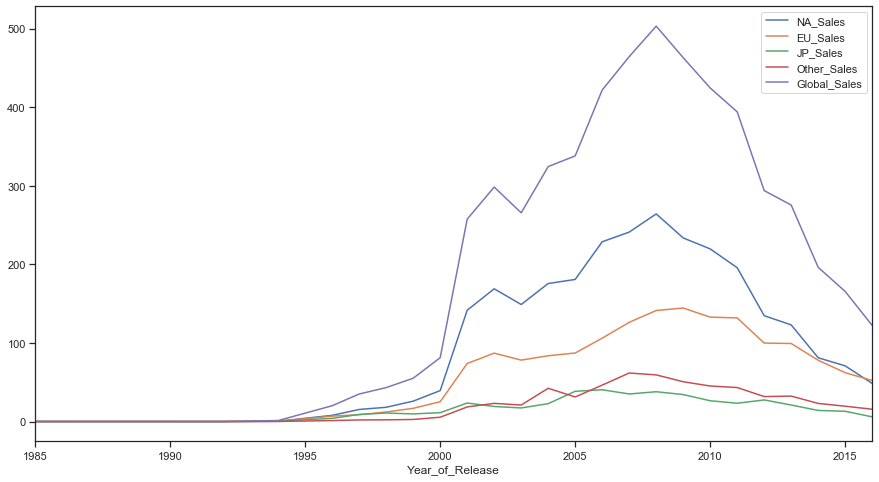

In [214]:
df1.plot()

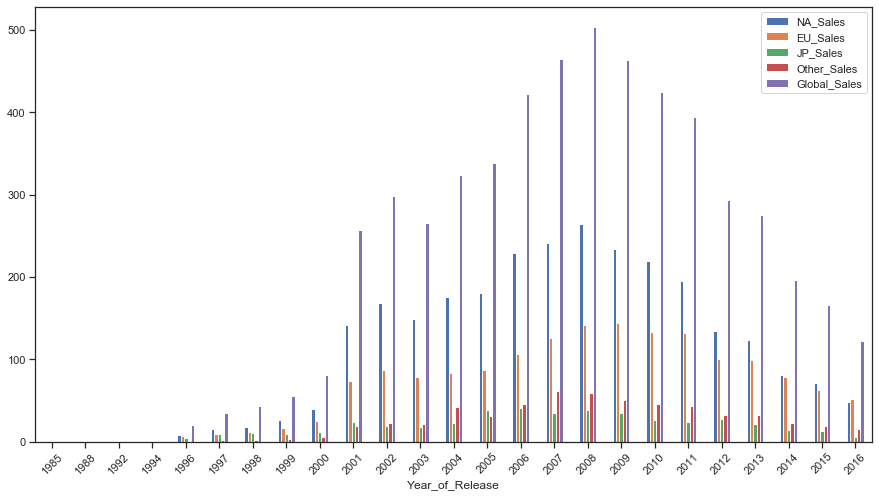

In [215]:
df1.plot(kind='bar', rot=45)

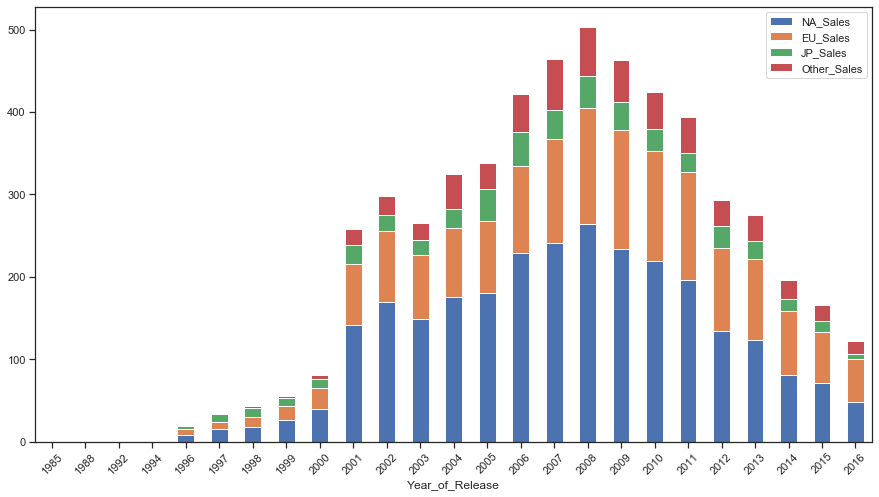

In [216]:
df1[list(filter(lambda x: x!='Global_Sales', df1.columns))]\
.plot(kind='bar', rot=45, stacked=True)

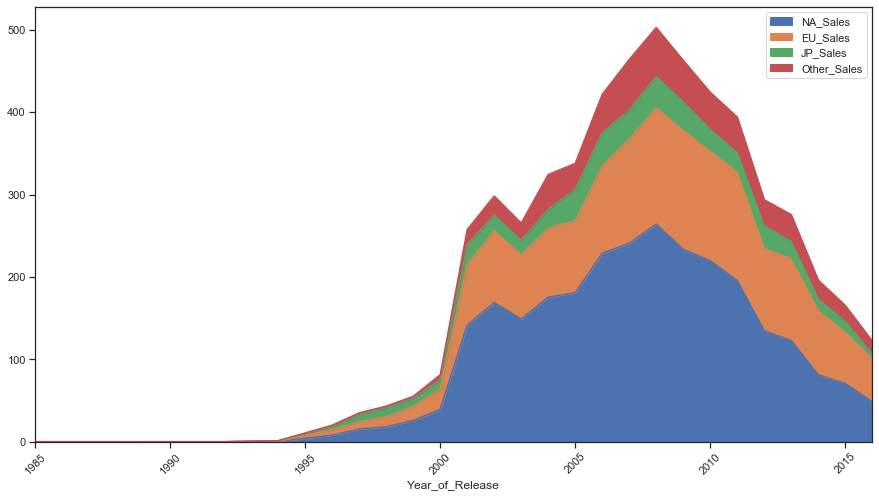

In [217]:
df1[list(filter(lambda x: x!='Global_Sales', df1.columns))]\
.plot(kind='area', rot=45, stacked=True)

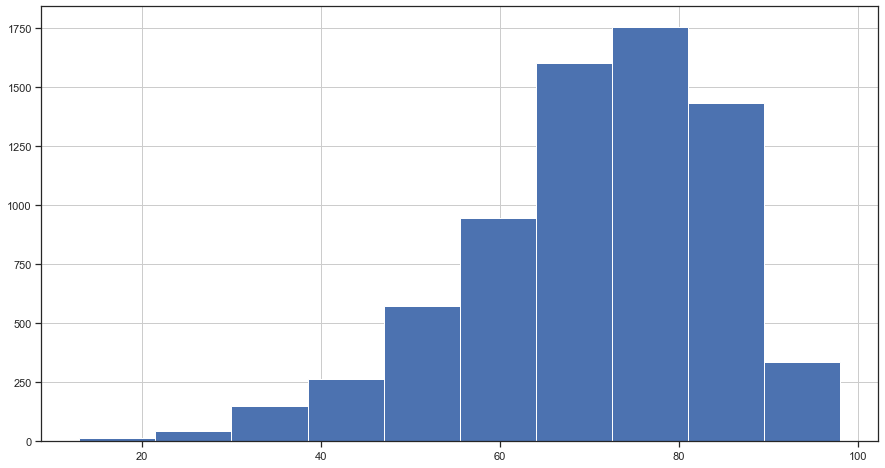

In [218]:
df.Critic_Score.hist()

Text(0, 0.5, 'games')

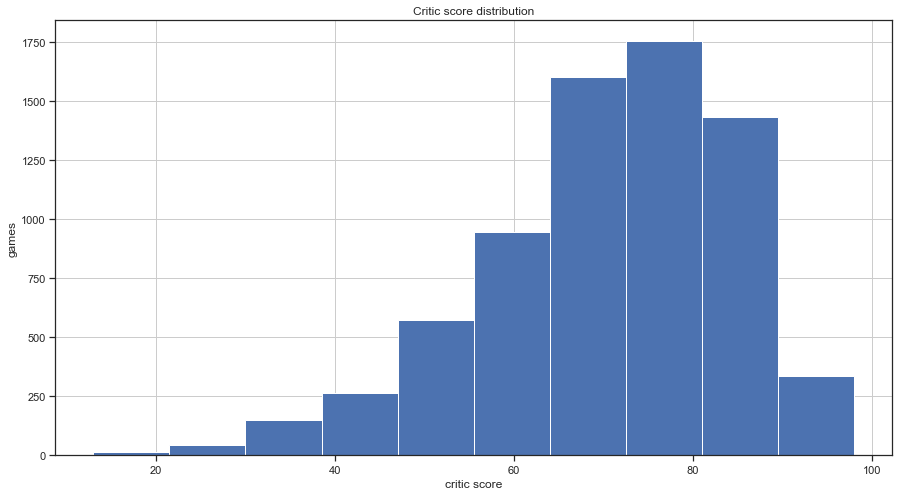

In [219]:
ex= df.Critic_Score.hist()
ex.set_title('Critic score distribution')
ex.set_xlabel('critic score')
ex.set_ylabel('games')


Text(0, 0.5, 'games')

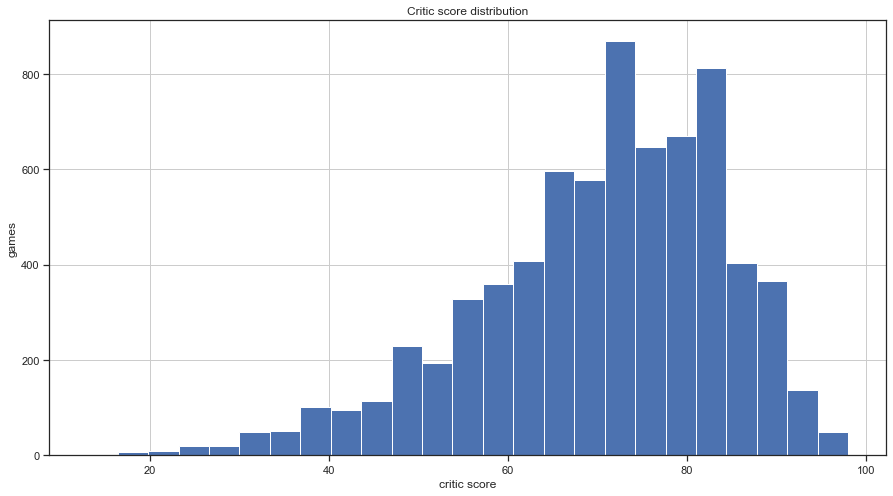

In [220]:
ex= df.Critic_Score.hist(bins=25)
ex.set_title('Critic score distribution')
ex.set_xlabel('critic score')
ex.set_ylabel('games')

In [221]:
top_developers_df=df.groupby('Publisher')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(10)
top_developers_df

,Global_Sales
Publisher,
Electronic Arts,898.12
Nintendo,862.30
Activision,549.01
Sony Computer Entertainment,395.52
Take-Two Interactive,355.73
Ubisoft,348.19
Microsoft Game Studios,219.25
THQ,164.64
Sega,151.56


In [222]:
top_developers_df.style.bar()

,Global_Sales
Publisher,
Electronic Arts,898.12
Nintendo,862.3
Activision,549.01
Sony Computer Entertainment,395.52
Take-Two Interactive,355.73
Ubisoft,348.19
Microsoft Game Studios,219.25
THQ,164.64
Sega,151.56


In [223]:
import seaborn as sns

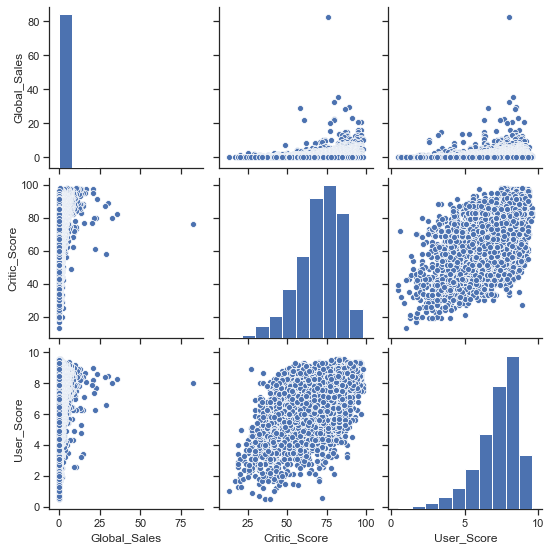

In [224]:
%config InlineBackend.figure.format='png'
sns.plot=sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']]);
sns.plot.savefig('pairplot.png')

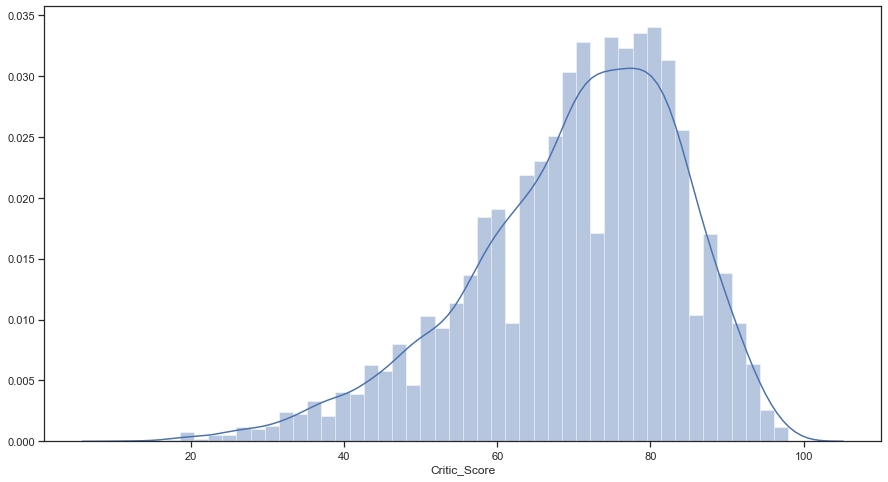

In [225]:
%config InlineBackend.figure.format='svg'
sns.distplot(df.Critic_Score)

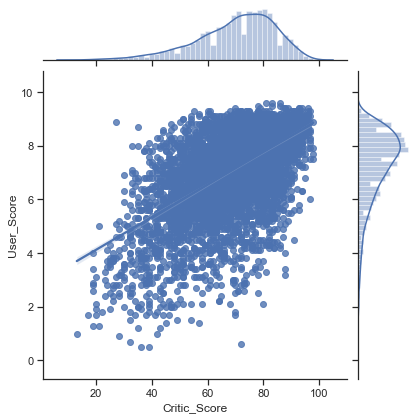

In [226]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='reg')

In [227]:
df.Platform.value_counts()

PS2     1169
X360     888
PS3      790
PC       734
X        586
Wii      493
DS       472
PSP      401
GC       363
PS4      255
GBA      249
XOne     169
3DS      161
PS       154
PSV      125
WiiU      89
DC        14
Name: Platform, dtype: int64

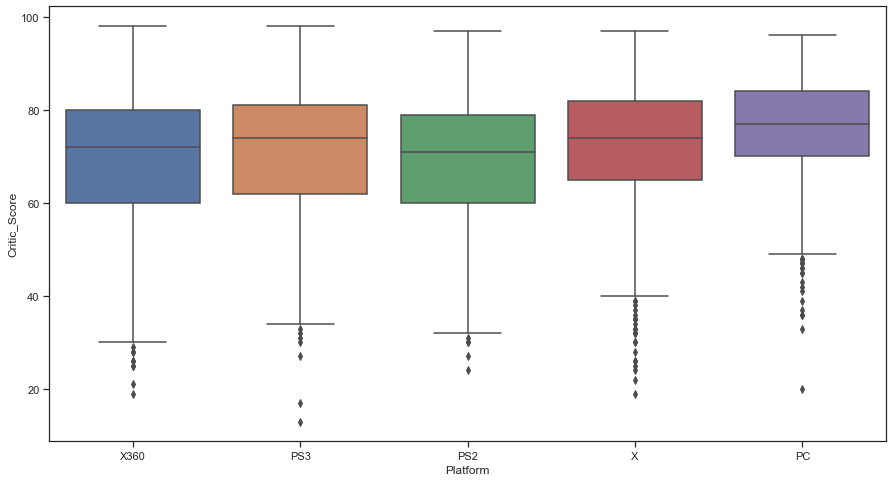

In [228]:
top_platforms=df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(x='Platform', y='Critic_Score', data=df[df.Platform.isin(top_platforms)])

In [229]:
platform_genre_sales=df.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum)\
.fillna(0).applymap(float)
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,31.73,2.06,2.64,4.91,27.95,2.65,14.27,20.16,1.10,21.79,2.23,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.85,8.83,3.37,68.88,56.08,50.53,29.99,60.88,6.40,42.74,6.02,8.64
GBA,23.90,4.54,3.28,8.59,40.44,5.94,12.60,21.01,1.54,2.66,5.93,3.34
GC,29.99,4.56,15.90,13.00,24.67,3.31,11.18,12.54,13.05,8.39,21.69,3.45
PC,27.35,1.52,0.26,3.18,0.48,0.21,3.48,45.59,39.67,41.07,6.67,26.03
PS,56.15,1.26,18.91,5.66,18.92,0.26,34.17,44.07,8.74,1.67,20.75,0.25
PS2,240.18,10.74,65.81,40.20,52.62,3.97,129.51,78.62,98.43,34.41,203.09,8.33
PS3,266.45,16.21,47.92,29.00,21.41,0.55,62.87,64.20,174.93,7.93,98.54,3.32


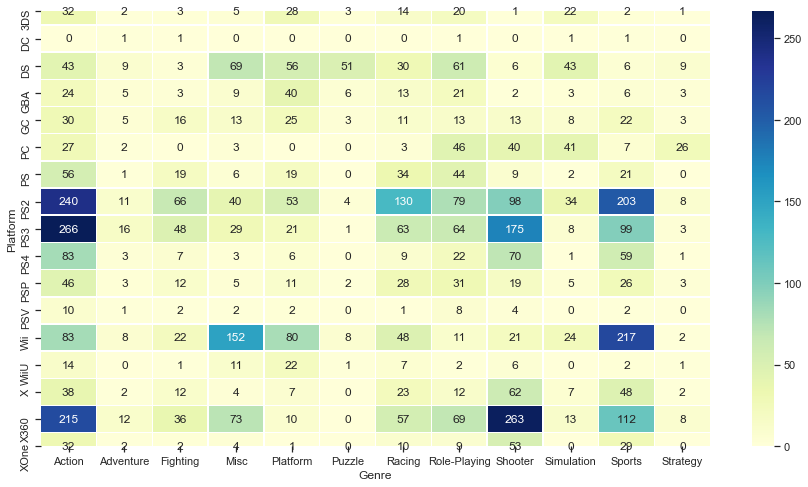

In [230]:
sns.heatmap(platform_genre_sales, annot=True, fmt='.0f', linewidth=0.5,  cmap="YlGnBu",annot_kws={'size':12})

In [231]:
import plotly
from plotly.offline import init_notebook_mode, iplot

import plotly.graph_objs as go
init_notebook_mode(connected=True)

динамика вышедших игр и их продажи по годам

In [232]:
global_sales_years_df= df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head(10)

,Global_Sales
Year_of_Release,
1985,0.03
1988,0.03
1992,0.03
1994,1.27
1996,20.10
1997,35.03
1998,43.18
1999,55.09
2000,81.27


In [233]:
released_years_df= df.groupby('Year_of_Release')[['EU_Sales']].sum()

released_years_df.head(10)


,EU_Sales
Year_of_Release,
1985,0.03
1988,0.02
1992,0.00
1994,0.26
1996,6.88
1997,8.68
1998,12.13
1999,16.81
2000,25.21


In [234]:
years_df= global_sales_years_df.merge(released_years_df, on='Year_of_Release')
years_df.head(10)

,Global_Sales,EU_Sales
Year_of_Release,,
1985,0.03,0.03
1988,0.03,0.02
1992,0.03,0.00
1994,1.27,0.26
1996,20.10,6.88
1997,35.03,8.68
1998,43.18,12.13
1999,55.09,16.81
2000,81.27,25.21


In [235]:
trace0=go.Scatter(
x=years_df.index,
y=years_df.Global_Sales,
name='Global Sales'
)

trace1=go.Scatter(
x=years_df.index,
y=years_df.EU_Sales,
name='EU Sales'
)

data=[trace0,trace1]
layout={'title':'Statistic of Sales'}
fig=go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)


In [236]:
data=[]
for genre in df.Genre.unique():
    data.append(
    go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
    
iplot(data, show_link=False)

In [237]:
scores_genres_df=df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
scores_genres_df.head(10)

,Critic_Score,User_Score
Genre,,
Action,67.820377,7.090165
Adventure,66.019231,7.143846
Fighting,69.887755,7.308418
Misc,67.666667,6.869674
Platform,69.927184,7.348544
Puzzle,71.110236,7.289764
Racing,69.501667,7.084833
Role-Playing,72.715832,7.599323
Shooter,70.894444,7.055222


In [238]:
sales_genres_df=df.groupby('Genre')[['Global_Sales']].sum()
sales_genres_df.head(10)




,Global_Sales
Genre,
Action,1239.48
Adventure,81.88
Fighting,253.91
Misc,426.73
Platform,383.21
Puzzle,79.87
Racing,482.26
Role-Playing,511.81
Shooter,840.84


In [239]:
genres_df= scores_genres_df.merge(sales_genres_df, on='Genre')
genres_df.head(10)


,Critic_Score,User_Score,Global_Sales
Genre,,,
Action,67.820377,7.090165,1239.48
Adventure,66.019231,7.143846,81.88
Fighting,69.887755,7.308418,253.91
Misc,67.666667,6.869674,426.73
Platform,69.927184,7.348544,383.21
Puzzle,71.110236,7.289764,79.87
Racing,69.501667,7.084833,482.26
Role-Playing,72.715832,7.599323,511.81
Shooter,70.894444,7.055222,840.84


In [240]:
trace0=go.Scatter(
x=genres_df.Critic_Score,
y=genres_df.User_Score,
mode='markers',
text=genres_df.index,
textposition ='top left',
marker = dict(
    size=1/10*genres_df.Global_Sales,
    color=['azure', 'pink', 'silver', 'yellow', 'lightblue', 'lightgreen', 'red', 'rosybrown', 'lavender', 'orange', 'indigo',
          'green']
    )
)

data=[trace0]
layout={'title':'Statistic of video games genres', 'yaxis': {'title': 'user score'}, 'xaxis': {'title': 'critic score'}}
fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)